In [1]:
import pandas as pd
import numpy as np
import os 
import sys
sys.path.append(os.path.join(os.path.dirname('ea2'), 'src'))
import importlib
import matplotlib.pyplot as plt
import ga_cutting_stock_problem
importlib.reload(ga_cutting_stock_problem)
from ga_cutting_stock_problem import CuttingStockAlgorithm


In [36]:
def try_mutation_rates(r, rectangles, crossover_rate = 0.8, population_size = 100, generations=500, eval_every=500):
    mutation_rates = [0.1, 0.3, 0.5, 0.7, 0.9]
    results = []

    for rate in mutation_rates:
        print(f"\nRunning with mutation_rate = {rate}")
        algo = CuttingStockAlgorithm(r=r, rectangles=rectangles, population_size=population_size, mutation_rate=rate, 
                                crossover_rate=crossover_rate, selection_method='tournament')
        
        best_ind, best_fit, history, best_inds = algo.run(generations=generations, mutation_type='random',
                                                        tournament_size=10, eval_every=eval_every)
        results.append({
            'mutation_rate': rate,
            'best_fitness': best_fit,
            'history': history,
            'best_individual': best_ind
        })
    return results

def try_crossover_rates(r, rectangles, mutation_rate = 0.2, population_size = 100, generations=500, eval_every=500):
    crossover_rates = [0.1, 0.3, 0.5, 0.7, 0.9]
    results = []

    for rate in crossover_rates:
        print(f"\nRunning with crossover rate = {rate}")
        algo = CuttingStockAlgorithm(r=r, rectangles=rectangles, population_size=population_size, mutation_rate=mutation_rate, 
                                crossover_rate=rate, selection_method='tournament')
        
        best_ind, best_fit, history, best_inds = algo.run(generations=generations, mutation_type='random',
                                                        tournament_size=10, eval_every=eval_every)
        results.append({
            'crossover_rate': rate,
            'best_fitness': best_fit,
            'history': history,
            'best_individual': best_ind
        })
    return results

### r800
target 30 000

In [3]:
r800 = pd.read_csv('./data/r800.csv', header=None)
r800.columns = ['height', 'width', 'value']

rectangles800 = list(r800[['height', 'width', 'value']].itertuples(index=False, name=None))
print(r800)
print(rectangles800)

   height  width  value
0     250    120    100
1     320    160    500
2     250    160    600
3     150    120     40
4     400     30    400
[(250, 120, 100), (320, 160, 500), (250, 160, 600), (150, 120, 40), (400, 30, 400)]


Generation 0, Best Fitness: 10500
Generation 20, Best Fitness: 16980
Generation 40, Best Fitness: 23640
Generation 60, Best Fitness: 26540
Generation 80, Best Fitness: 28080
Generation 100, Best Fitness: 28620
Generation 120, Best Fitness: 29420
Generation 140, Best Fitness: 29560
Generation 160, Best Fitness: 29560
Generation 180, Best Fitness: 30260


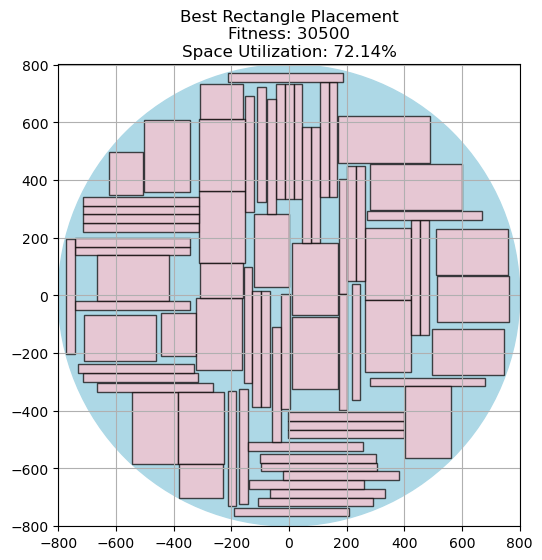

In [53]:
r800_algo = CuttingStockAlgorithm(r=800, rectangles=rectangles800, population_size=1000,
                                  mutation_rate=0.7, crossover_rate=0.8, selection_method='tournament')
r800_best_individual, r800_best_fitness, r800_history, r800_best_individuals = r800_algo.run(generations=200, eval_every=20,
                                                                                             mutation_type='random', tournament_size=5)
r800_algo.plot_best_individual()

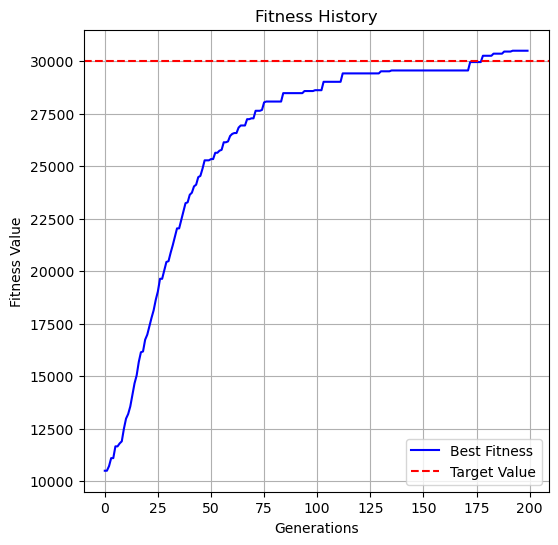

In [54]:
r800_algo.plot_fitness_history(r800_history, target_value=30000)

In [7]:
r800_mr_results = try_mutation_rates(r=800, rectangles=r800, population_size=100, generations=100, eval_every=100)


Running with mutation_rate = 0.1
Generation 0, Best Fitness: 9960

Running with mutation_rate = 0.3
Generation 0, Best Fitness: 10420

Running with mutation_rate = 0.5
Generation 0, Best Fitness: 9900

Running with mutation_rate = 0.7
Generation 0, Best Fitness: 10380

Running with mutation_rate = 0.9
Generation 0, Best Fitness: 10520


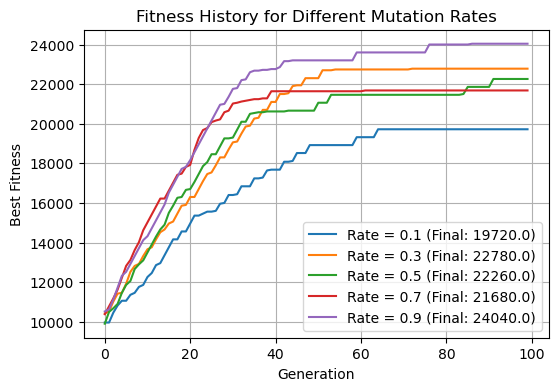

In [16]:
plt.figure(figsize=(6, 4))

for res in r800_mr_results:
    plt.plot(res['history'], label=f"Rate = {res['mutation_rate']} (Final: {res['history'][-1]:.1f})")

plt.title('Fitness History for Different Mutation Rates')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
r800_cr_results = try_crossover_rates(r=800, rectangles=r800, population_size=100, generations=100, eval_every=100)


Running with mutation_rate = 0.1
Generation 0, Best Fitness: 11400

Running with mutation_rate = 0.3
Generation 0, Best Fitness: 9980

Running with mutation_rate = 0.5
Generation 0, Best Fitness: 10340

Running with mutation_rate = 0.7
Generation 0, Best Fitness: 10060

Running with mutation_rate = 0.9
Generation 0, Best Fitness: 9120


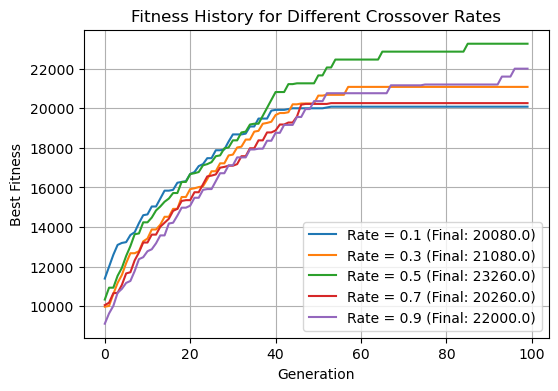

In [18]:
plt.figure(figsize=(6, 4))

for res in r800_cr_results:
    plt.plot(res['history'], label=f"Rate = {res['crossover_rate']} (Final: {res['history'][-1]:.1f})")

plt.title('Fitness History for Different Crossover Rates')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.legend()
plt.grid(True)
plt.show()

trying different selection methods

Generation 0, Best Fitness: 10100
Generation 20, Best Fitness: 12260
Generation 40, Best Fitness: 15360
Generation 60, Best Fitness: 18780
Generation 80, Best Fitness: 21600
Generation 100, Best Fitness: 23900
Generation 120, Best Fitness: 25540
Generation 140, Best Fitness: 26640
Generation 160, Best Fitness: 27520
Generation 180, Best Fitness: 27920


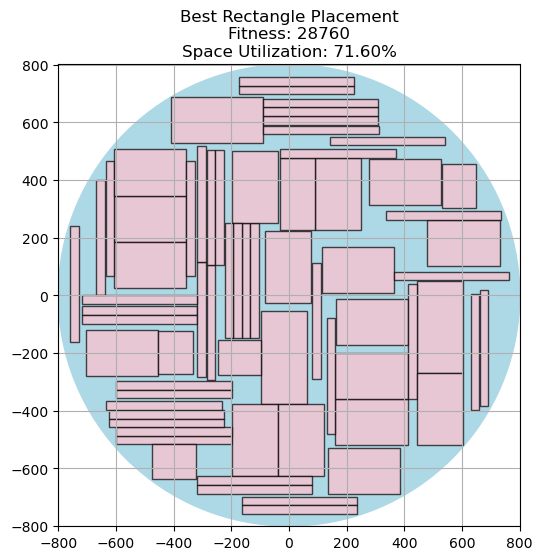

In [64]:
r800_algo_rank = CuttingStockAlgorithm(r=800, rectangles=rectangles800, population_size=1000,
                                  mutation_rate=0.7, crossover_rate=0.8, selection_method='rank')
r800_best_individual_rank, r800_best_fitness_rank, r800_history_rank, r800_best_individuals_rank \
      = r800_algo_rank.run(generations=200, eval_every=20, mutation_type='random')
r800_algo_rank.plot_best_individual()

Generation 0, Best Fitness: 10220
Generation 20, Best Fitness: 12600
Generation 40, Best Fitness: 14800
Generation 60, Best Fitness: 16400
Generation 80, Best Fitness: 17600
Generation 100, Best Fitness: 19240
Generation 120, Best Fitness: 21280
Generation 140, Best Fitness: 22120
Generation 160, Best Fitness: 22200
Generation 180, Best Fitness: 22240


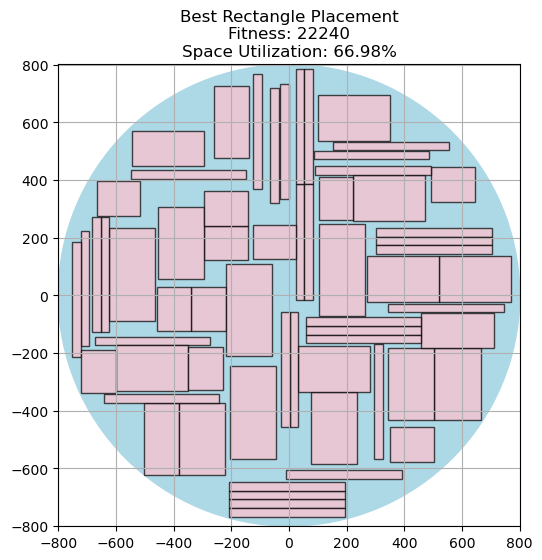

In [65]:
r800_algo_roulette = CuttingStockAlgorithm(r=800, rectangles=rectangles800, population_size=1000,
                                  mutation_rate=0.7, crossover_rate=0.8, selection_method='roulette')
r800_best_individual_roulette, r800_best_fitness_roulette, r800_history_roulette, r800_best_individuals_roulette \
      = r800_algo_roulette.run(generations=200, eval_every=20, mutation_type='random')
r800_algo_roulette.plot_best_individual()

### r850
no target value

In [43]:
r850 = pd.read_csv('./data/r850.csv', header=None)
r850.columns = ['height', 'width', 'value']

rectangles850 = list(r850[['height', 'width', 'value']].itertuples(index=False, name=None))
print(r850)
print(rectangles850)

   height  width  value
0      10    120    120
1     120     10    150
2     400     20   1200
3     300     30   1200
4     120    120   1200
5     100    100    900
6     450     80  11000
[(10, 120, 120), (120, 10, 150), (400, 20, 1200), (300, 30, 1200), (120, 120, 1200), (100, 100, 900), (450, 80, 11000)]


Generation 0, Best Fitness: 136250
Generation 20, Best Fitness: 251340
Generation 40, Best Fitness: 320460
Generation 60, Best Fitness: 366540
Generation 80, Best Fitness: 386190
Generation 100, Best Fitness: 399240
Generation 120, Best Fitness: 404310
Generation 140, Best Fitness: 407070
Generation 160, Best Fitness: 409350
Generation 180, Best Fitness: 411480


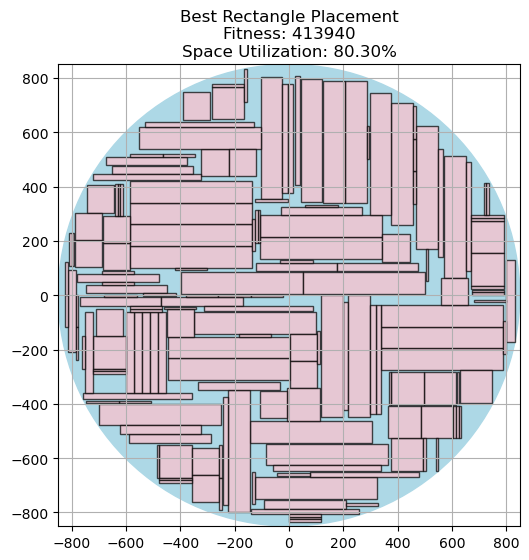

In [63]:
r850_algo = CuttingStockAlgorithm(r=850, rectangles=rectangles850, population_size=1000,
                                  mutation_rate=0.7, crossover_rate=0.8, selection_method='tournament')
r850_best_individual, r850_best_fitness, r850_history, r850_best_individuals = r850_algo.run(generations=200, eval_every=20,
                                                                                             mutation_type='random', tournament_size=5)
r850_algo.plot_best_individual()

### r1000
target 17 500

In [25]:
r1000 = pd.read_csv('./data/r1000.csv', header=None)
r1000.columns = ['height', 'width', 'value']

rectangles1000 = list(r1000[['height', 'width', 'value']].itertuples(index=False, name=None))
print(r1000)
print(rectangles1000)

   height  width  value
0     200    120    200
1     200    160    300
2     250    160    500
3     100    120     40
[(200, 120, 200), (200, 160, 300), (250, 160, 500), (100, 120, 40)]


Generation 0, Best Fitness: 11360
Generation 20, Best Fitness: 15560
Generation 40, Best Fitness: 19540
Generation 60, Best Fitness: 21240
Generation 80, Best Fitness: 22040
Generation 100, Best Fitness: 22980
Generation 120, Best Fitness: 23580
Generation 140, Best Fitness: 23860
Generation 160, Best Fitness: 24100
Generation 180, Best Fitness: 24220


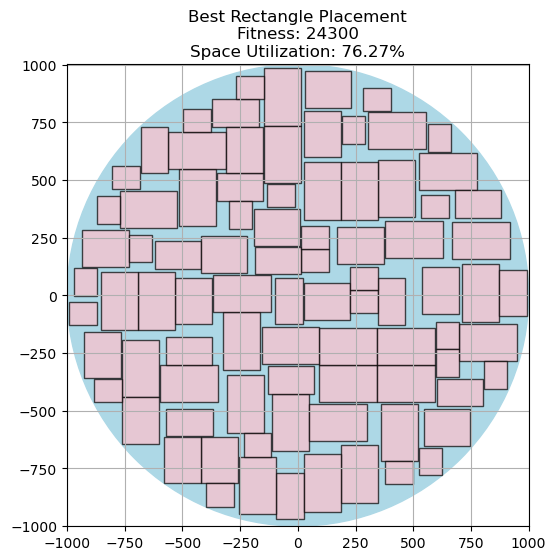

In [61]:
r1000_algo = CuttingStockAlgorithm(r=1000, rectangles=rectangles1000, population_size=1000,
                                  mutation_rate=0.7, crossover_rate=0.8, selection_method='tournament')
r1000_best_individual, r1000_best_fitness, r1000_history, r1000_best_individuals = r1000_algo.run(generations=200, 
                                                                                             mutation_type='random', eval_every=20)
r1000_algo.plot_best_individual()

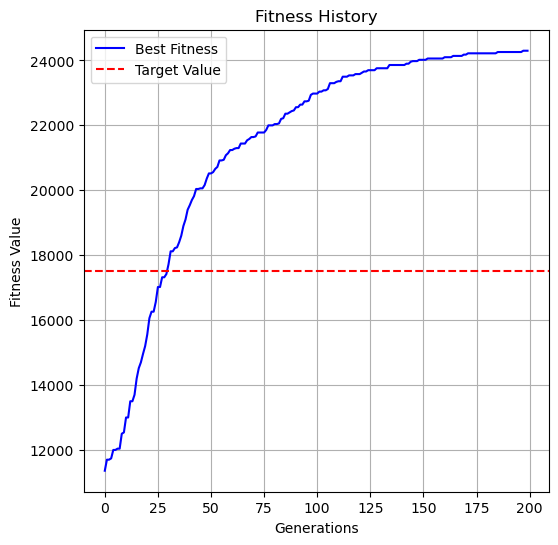

In [62]:
r1000_algo.plot_fitness_history(r1000_history, target_value=17500)


Running with mutation_rate = 0.1
Generation 0, Best Fitness: 10360

Running with mutation_rate = 0.3
Generation 0, Best Fitness: 10620

Running with mutation_rate = 0.5
Generation 0, Best Fitness: 10960

Running with mutation_rate = 0.7
Generation 0, Best Fitness: 10960

Running with mutation_rate = 0.9
Generation 0, Best Fitness: 10600


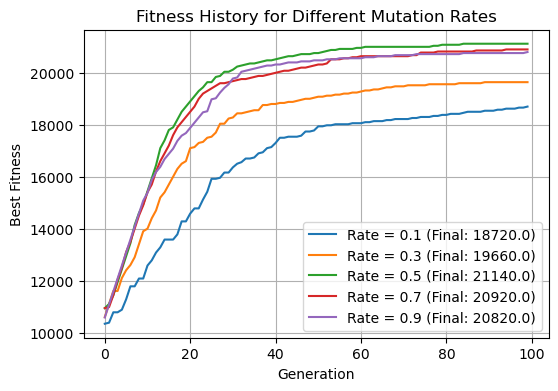

In [30]:
r1000_mr_results = try_mutation_rates(r=1000, rectangles=r1000, population_size=100, generations=100, eval_every=100)
plt.figure(figsize=(6, 4))

for res in r1000_mr_results:
    plt.plot(res['history'], label=f"Rate = {res['mutation_rate']} (Final: {res['history'][-1]:.1f})")

plt.title('Fitness History for Different Mutation Rates')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.legend()
plt.grid(True)
plt.show()


Running with mutation_rate = 0.1
Generation 0, Best Fitness: 10660

Running with mutation_rate = 0.3
Generation 0, Best Fitness: 11600

Running with mutation_rate = 0.5
Generation 0, Best Fitness: 10460

Running with mutation_rate = 0.7
Generation 0, Best Fitness: 11120

Running with mutation_rate = 0.9
Generation 0, Best Fitness: 10920


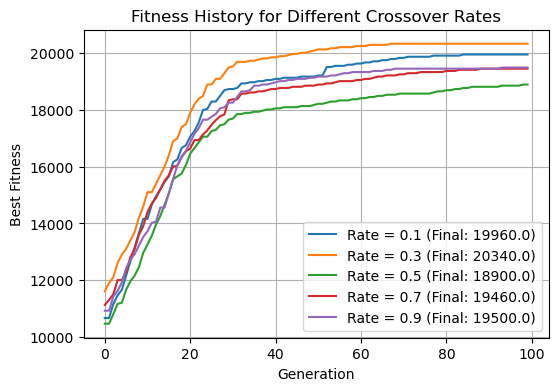

In [31]:
r1000_cr_results = try_crossover_rates(r=1000, rectangles=r1000, population_size=100, generations=100, eval_every=100)
plt.figure(figsize=(6, 4))

for res in r1000_cr_results:
    plt.plot(res['history'], label=f"Rate = {res['crossover_rate']} (Final: {res['history'][-1]:.1f})")

plt.title('Fitness History for Different Crossover Rates')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.legend()
plt.grid(True)
plt.show()

### r1100
target 25 000

In [32]:
r1100 = pd.read_csv('./data/r1100.csv', header=None)
r1100.columns = ['height', 'width', 'value']

rectangles1100 = list(r1100[['height', 'width', 'value']].itertuples(index=False, name=None))
print(r1100)
print(rectangles1100)

   height  width  value
0     250    120    100
1     120    360    300
2     250    160    600
3     150    120     40
[(250, 120, 100), (120, 360, 300), (250, 160, 600), (150, 120, 40)]


Generation 0, Best Fitness: 13140
Generation 20, Best Fitness: 19920
Generation 40, Best Fitness: 26460
Generation 60, Best Fitness: 30540
Generation 80, Best Fitness: 33080
Generation 100, Best Fitness: 34820
Generation 120, Best Fitness: 36000
Generation 140, Best Fitness: 36680
Generation 160, Best Fitness: 36820
Generation 180, Best Fitness: 36940


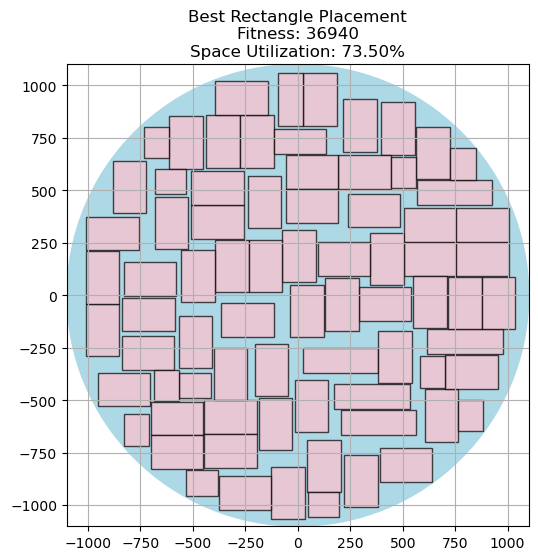

In [59]:
r1100_algo = CuttingStockAlgorithm(r=1100, rectangles=rectangles1100, population_size=1000,
                                  mutation_rate=0.7, crossover_rate=0.8, selection_method='tournament')
r1100_best_individual, r1100_best_fitness, r1100_history, r1100_best_individuals = r1100_algo.run(generations=200, eval_every=20,
                                                                                             mutation_type='random')
r1100_algo.plot_best_individual()

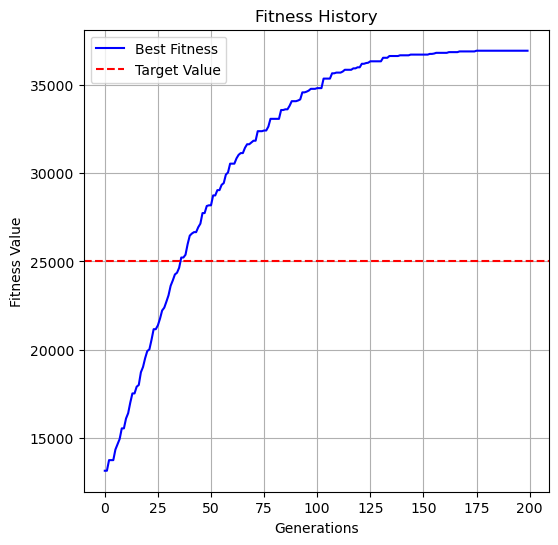

In [60]:
r1100_algo.plot_fitness_history(r1100_history, target_value=25000)


Running with mutation_rate = 0.1
Generation 0, Best Fitness: 11180

Running with mutation_rate = 0.3
Generation 0, Best Fitness: 10940

Running with mutation_rate = 0.5
Generation 0, Best Fitness: 11260

Running with mutation_rate = 0.7
Generation 0, Best Fitness: 12580

Running with mutation_rate = 0.9
Generation 0, Best Fitness: 10940


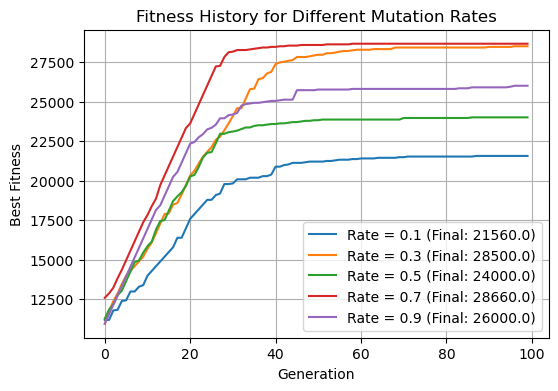

In [35]:
r1100_mr_results = try_mutation_rates(r=1100, rectangles=r1100, population_size=100, generations=100, eval_every=100)
plt.figure(figsize=(6, 4))

for res in r1100_mr_results:
    plt.plot(res['history'], label=f"Rate = {res['mutation_rate']} (Final: {res['history'][-1]:.1f})")

plt.title('Fitness History for Different Mutation Rates')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.legend()
plt.grid(True)
plt.show()


Running with crossover rate = 0.1
Generation 0, Best Fitness: 11420

Running with crossover rate = 0.3
Generation 0, Best Fitness: 11340

Running with crossover rate = 0.5
Generation 0, Best Fitness: 11900

Running with crossover rate = 0.7
Generation 0, Best Fitness: 11520

Running with crossover rate = 0.9
Generation 0, Best Fitness: 11440


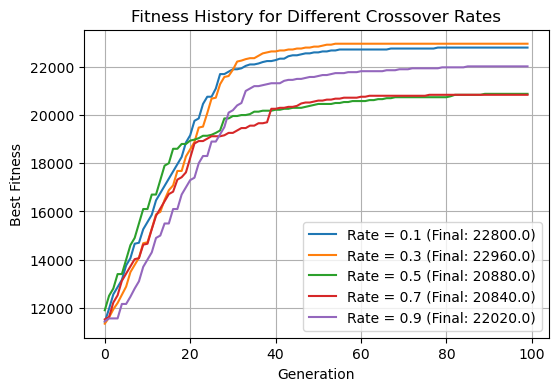

In [37]:
r1100_cr_results = try_crossover_rates(r=1100, rectangles=r1100, population_size=100, generations=100, eval_every=100)
plt.figure(figsize=(6, 4))

for res in r1100_cr_results:
    plt.plot(res['history'], label=f"Rate = {res['crossover_rate']} (Final: {res['history'][-1]:.1f})")

plt.title('Fitness History for Different Crossover Rates')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.legend()
plt.grid(True)
plt.show()

### r1200
target 30 000

In [38]:
r1200 = pd.read_csv('./data/r1200.csv', header=None)
r1200.columns = ['height', 'width', 'value']

rectangles1200 = list(r1200[['height', 'width', 'value']].itertuples(index=False, name=None))
print(r1200)
print(rectangles1200)

   height  width  value
0     200    120    200
1     200    160    300
2     250    160    500
3     100    120     40
[(200, 120, 200), (200, 160, 300), (250, 160, 500), (100, 120, 40)]


Generation 0, Best Fitness: 15360
Generation 20, Best Fitness: 20580
Generation 40, Best Fitness: 27260
Generation 60, Best Fitness: 30620
Generation 80, Best Fitness: 32940
Generation 100, Best Fitness: 34200
Generation 120, Best Fitness: 34980
Generation 140, Best Fitness: 35880
Generation 160, Best Fitness: 36140
Generation 180, Best Fitness: 36360


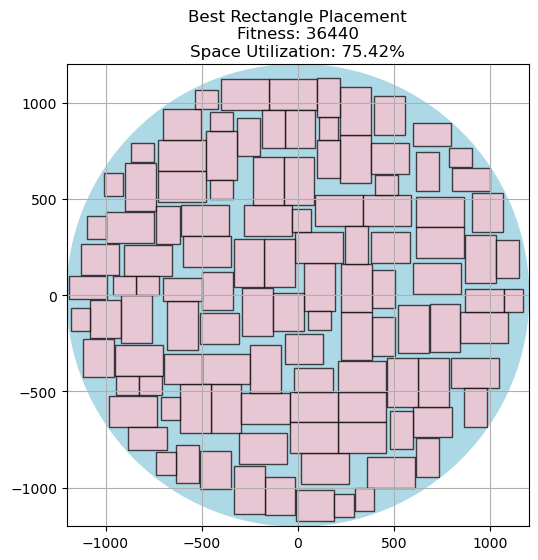

In [57]:
r1200_algo = CuttingStockAlgorithm(r=1200, rectangles=rectangles1200, population_size=1000,
                                  mutation_rate=0.7, crossover_rate=0.8, selection_method='tournament')
r1200_best_individual, r1200_best_fitness, r1200_history, r1200_best_individuals = r1200_algo.run(generations=200, eval_every=20,
                                                                                             mutation_type='random')
r1200_algo.plot_best_individual()

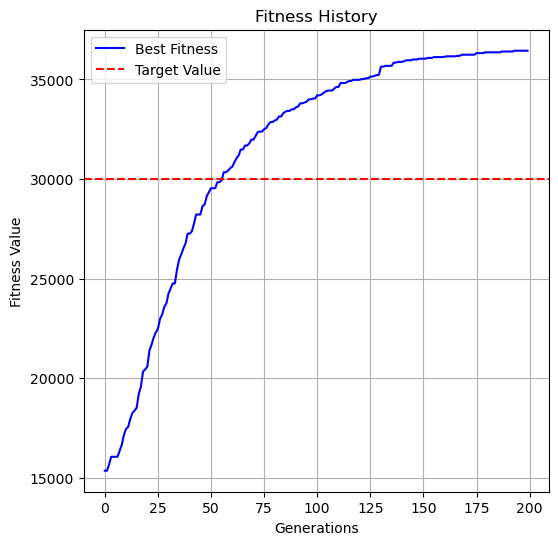

In [58]:
r1200_algo.plot_fitness_history(r1200_history, target_value=30000)


Running with mutation_rate = 0.1
Generation 0, Best Fitness: 14820

Running with mutation_rate = 0.3
Generation 0, Best Fitness: 14000

Running with mutation_rate = 0.5
Generation 0, Best Fitness: 14660

Running with mutation_rate = 0.7
Generation 0, Best Fitness: 13560

Running with mutation_rate = 0.9
Generation 0, Best Fitness: 13600


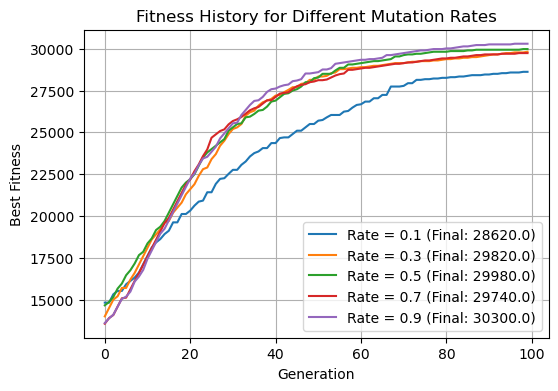

In [41]:
r1200_mr_results = try_mutation_rates(r=1200, rectangles=r1200, population_size=100, generations=100, eval_every=100)
plt.figure(figsize=(6, 4))

for res in r1200_mr_results:
    plt.plot(res['history'], label=f"Rate = {res['mutation_rate']} (Final: {res['history'][-1]:.1f})")

plt.title('Fitness History for Different Mutation Rates')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.legend()
plt.grid(True)
plt.show()


Running with crossover rate = 0.1
Generation 0, Best Fitness: 14400

Running with crossover rate = 0.3
Generation 0, Best Fitness: 14140

Running with crossover rate = 0.5
Generation 0, Best Fitness: 14780

Running with crossover rate = 0.7
Generation 0, Best Fitness: 13760

Running with crossover rate = 0.9
Generation 0, Best Fitness: 14800


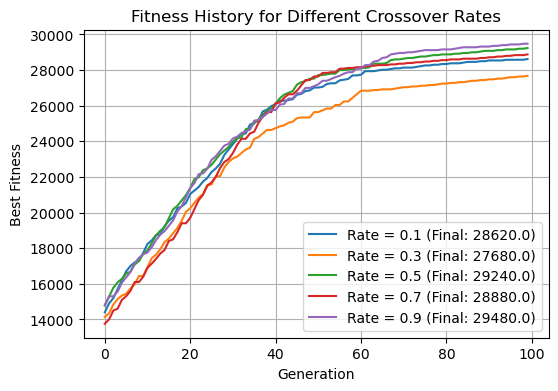

In [42]:
r1200_cr_results = try_crossover_rates(r=1200, rectangles=r1200, population_size=100, generations=100, eval_every=100)
plt.figure(figsize=(6, 4))

for res in r1200_cr_results:
    plt.plot(res['history'], label=f"Rate = {res['crossover_rate']} (Final: {res['history'][-1]:.1f})")

plt.title('Fitness History for Different Crossover Rates')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.legend()
plt.grid(True)
plt.show()